In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [162]:
import pandas as pd

try:
    df = pd.read_excel("E:/Jupyter Notebook/Mall_Customer/Final Mall Customer Dataset.xlsx")
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print("❌ Error loading dataset:", e)



✅ Dataset loaded successfully!


In [163]:
print("🔍 Checking dataset info...\n")
df.info()


🔍 Checking dataset info...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   int64  
 1   Gender               5000 non-null   object 
 2   Age                  5000 non-null   int64  
 3   Age_Group            5000 non-null   object 
 4   Annual_Income_k$     5000 non-null   int64  
 5   Spending_Score       5000 non-null   int64  
 6   Visit_Frequency      5000 non-null   int64  
 7   Avg_Time_Spent_Min   5000 non-null   int64  
 8   Preferred_Day        5000 non-null   object 
 9   Payment_Method       5000 non-null   object 
 10  Loyalty_Member       5000 non-null   object 
 11  Total_Amount_Spent   5000 non-null   float64
 12  Num_Returns          5000 non-null   int64  
 13  Marketing_Opt_In     5000 non-null   object 
 14  Last_Visit_Days_Ago  5000 non-null   int64  
dtypes: float64

In [164]:
print("\n🔍 Missing values in each column:\n")
print(df.isnull().sum())



🔍 Missing values in each column:

CustomerID             0
Gender                 0
Age                    0
Age_Group              0
Annual_Income_k$       0
Spending_Score         0
Visit_Frequency        0
Avg_Time_Spent_Min     0
Preferred_Day          0
Payment_Method         0
Loyalty_Member         0
Total_Amount_Spent     0
Num_Returns            0
Marketing_Opt_In       0
Last_Visit_Days_Ago    0
dtype: int64


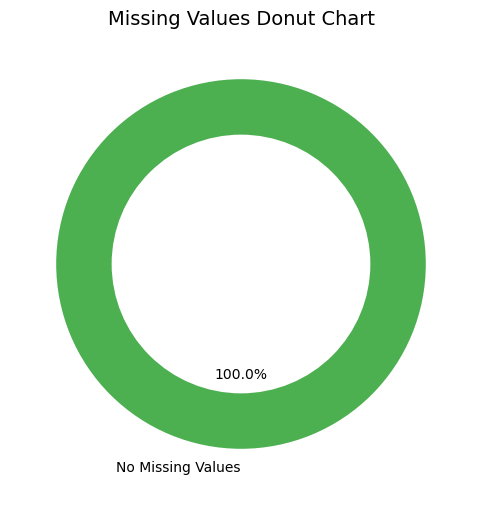

In [165]:
import matplotlib.pyplot as plt

# Donut chart for NO missing values
labels = ['No Missing Values']
sizes = [100]  # 100%
colors = ['#4CAF50']  # Attractive green

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# Create donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Missing Values Donut Chart", fontsize=14)
plt.show()


In [166]:
duplicates = df.duplicated().sum()
print(f"\n🔍 Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("✔ Duplicates removed successfully!")
else:
    print("✔ No duplicates found.")



🔍 Number of duplicate rows: 0
✔ No duplicates found.


In [167]:
print("\n📊 Summary statistics:\n")
df.describe(include='all')



📊 Summary statistics:



CustomerID Gender          Age Age_Group  Annual_Income_k$  \
count   5000.000000   5000  5000.000000      5000       5000.000000   
unique          NaN      2          NaN         4               NaN   
top             NaN   Male          NaN    Senior               NaN   
freq            NaN   2504          NaN      1805               NaN   
mean    2500.500000    NaN    43.420800       NaN         84.317400   
std     1443.520003    NaN    14.901159       NaN         37.184314   
min        1.000000    NaN    18.000000       NaN         20.000000   
25%     1250.750000    NaN    31.000000       NaN         52.000000   
50%     2500.500000    NaN    43.000000       NaN         85.000000   
75%     3750.250000    NaN    56.000000       NaN        116.000000   
max     5000.000000    NaN    69.000000       NaN        149.000000   

        Spending_Score  Visit_Frequency  Avg_Time_Spent_Min Preferred_Day  \
count      5000.000000      5000.000000         5000.000000          5000   
unique             NaN              NaN                 NaN             2   
top                NaN              NaN                 NaN       Weekday   
freq               NaN              NaN                 NaN          2537   
mean         49.895200        15.323600           95.139600           NaN   
std          28.857449         8.590788           49.100577           NaN   
min           1.000000         1.000000           10.000000           NaN   
25%          24.000000         8.000000           53.000000           NaN   
50%          50.000000        15.000000           95.000000           NaN   
75%          75.000000        23.000000          138.000000           NaN   
max         100.000000        30.000000          180.000000           NaN   

       Payment_Method Loyalty_Member  Total_Amount_Spent  Num_Returns  \
count            5000           5000         5000.000000  5000.000000   
unique              4              2                 NaN          NaN   
top               UPI            Yes                 NaN          NaN   
freq             1276           2540                 NaN          NaN   
mean              NaN            NaN        25170.031832     4.581200   
std               NaN            NaN        14309.577732     2.887746   
min               NaN            NaN          107.270000     0.000000   
25%               NaN            NaN        13003.810000     2.000000   
50%               NaN            NaN        25390.585000     5.000000   
75%               NaN            NaN        37468.717500     7.000000   
max               NaN            NaN        49998.700000     9.000000   

       Marketing_Opt_In  Last_Visit_Days_Ago  
count              5000          5000.000000  
unique                2                  NaN  
top                  No                  NaN  
freq               2558                  NaN  
mean                NaN           181.827600  
std                 NaN           105.229035  
min                 NaN             1.000000  
25%                 NaN            89.000000  
50%                 NaN           182.000000  
75%                 NaN           272.000000  
max                 NaN           364.000000

In [169]:
!pip install squarify

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Categorical columns
categorical_cols = ['Gender', 'Age_Group']

for col in categorical_cols:
    data = df[col].value_counts()
    labels = data.index
    sizes = data.values

    # ==========================
    # 📌 1. GENDER → TREEMAP (with count + percentage)
    # ==========================
    if col == 'Gender':
        plt.figure(figsize=(7,5))
        
        total = sizes.sum()
        labels_with_pct = [
            f"{label}\n{value} ({(value/total)*100:.1f}%)"
            for label, value in zip(labels, sizes)
        ]

        squarify.plot(
            sizes=sizes,
            label=labels_with_pct,
            alpha=0.85,
            text_kwargs={'fontsize':14, 'weight':'bold'}
        )

        plt.title("Gender Distribution (Treemap)", fontsize=14)
        plt.axis('off')
        plt.show()

    # ==========================
    # 📌 2. AGE GROUP → DONUT CHART (with percentages)
    # ==========================
    elif col == 'Age_Group':
        plt.figure(figsize=(6,6))
        
        plt.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90
        )

        centre_circle = plt.Circle((0,0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        plt.title("Age Group Distribution (Donut Chart)", fontsize=14)
        plt.show()


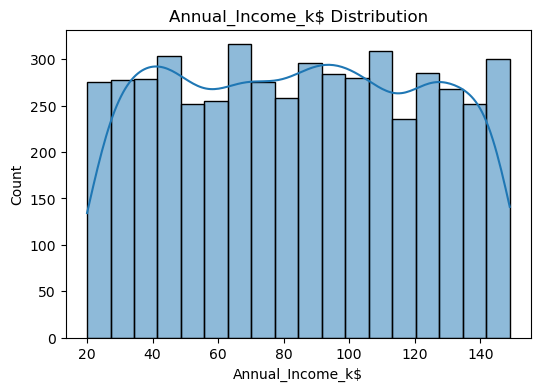

In [170]:
numeric_cols = ['Annual_Income_k$', 'Spending_Score']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


NaNs after coercion (per column):
Annual_Income_k$    0
Spending_Score      0
dtype: int64


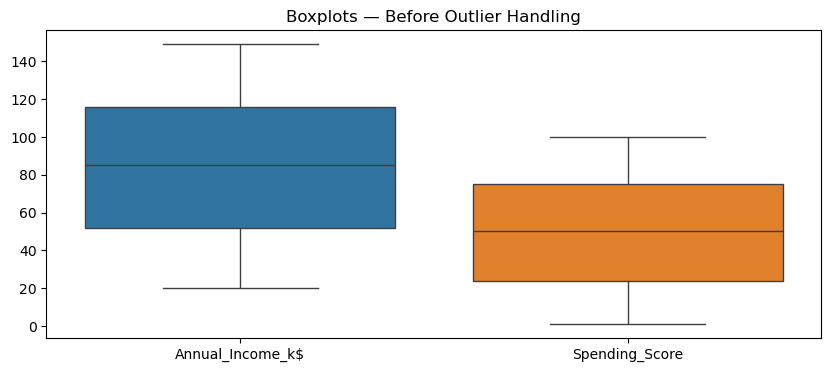


Outlier counts by column:
Annual_Income_k$    0
Spending_Score      0
dtype: int64

Number of rows that are outliers in at least one numeric column: 0


In [171]:
numeric_cols = ['Annual_Income_k$', 'Spending_Score']
existing_numeric = [c for c in numeric_cols if c in df.columns]
if len(existing_numeric) != len(numeric_cols):
    missing = set(numeric_cols) - set(existing_numeric)
    raise KeyError(f"Missing expected numeric columns in dataframe: {missing}")

# 1) Ensure numeric dtype (coerce non-numeric -> NaN)
for c in existing_numeric:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# report any NaNs created by coercion
print("NaNs after coercion (per column):")
print(df[existing_numeric].isnull().sum())

# 2) Plot boxplots BEFORE handling outliers
plt.figure(figsize=(10,4))
sns.boxplot(data=df[existing_numeric])
plt.title("Boxplots — Before Outlier Handling")
plt.show()

# 3) IQR-based outlier detection functions
def iqr_bounds(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

def iqr_outlier_mask(series, k=1.5):
    lower, upper = iqr_bounds(series, k=k)
    return (series < lower) | (series > upper)

# 4) Build outlier mask (True where a value is an outlier)
outlier_mask_df = pd.DataFrame({c: iqr_outlier_mask(df[c]) for c in existing_numeric})
outlier_counts_by_col = outlier_mask_df.sum()
total_outlier_rows = outlier_mask_df.any(axis=1).sum()

print("\nOutlier counts by column:")
print(outlier_counts_by_col)
print(f"\nNumber of rows that are outliers in at least one numeric column: {total_outlier_rows}")

# show a small sample of outlier rows (if any)
if total_outlier_rows > 0:
    print("\nSample outlier rows (first 5):")
    display(df.loc[outlier_mask_df.any(axis=1), existing_numeric].head())

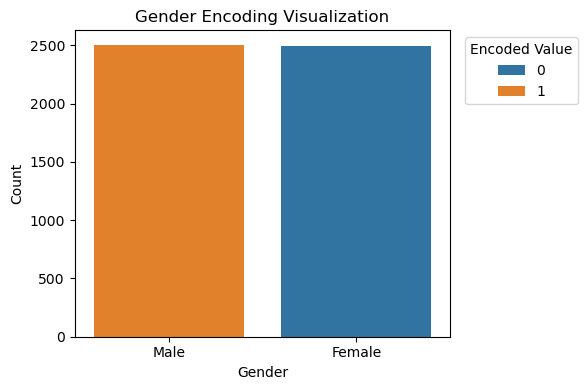

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode Gender
df['Gender_Encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Gender_Encoded', data=df)

plt.title("Gender Encoding Visualization")
plt.xlabel("Gender")
plt.ylabel("Count")

# ✅ Move legend to right side
plt.legend(
    title="Encoded Value",
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)

plt.tight_layout()
plt.show()


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ---------------------------------
# Encode Age Group (SAFE WAY)
# ---------------------------------
if 'Age_Group_Encoded' not in df.columns:
    le = LabelEncoder()
    df['Age_Group_Encoded'] = le.fit_transform(df['Age_Group'])

# ---------------------------------
# Plot
# ---------------------------------
plt.figure(figsize=(10,6))  # increased figure size

# Use hue to satisfy Seaborn 0.14+ and keep separate legend
# Use a bright, distinct palette
ax = sns.countplot(
    x='Age_Group_Encoded',
    data=df,
    hue='Age_Group_Encoded',   
    palette='bright',           # bright color palette
    dodge=False
)

# Replace x-tick labels with original age group names
ax.set_xticks(np.arange(len(le.classes_)))
ax.set_xticklabels(le.classes_)

# Customize legend outside the plot
legend_labels = [f'Cluster {i}' for i in range(len(le.classes_))]
ax.legend(
    title='Clusters',
    labels=legend_labels,
    loc='upper left',
    bbox_to_anchor=(1.0, 1.0)
)

plt.title("Age Group Distribution (Encoded)", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Customer Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [174]:
df_encoded = df.drop(columns=['Gender', 'Age_Group'], errors='ignore')


In [175]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Make sure the encoded columns exist
if 'Gender_Encoded' not in df.columns:
    df['Gender_Encoded'] = df['Genre'].map({'Male':0, 'Female':1})

if 'Age_Group_Encoded' not in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['Age_Group_Encoded'] = le.fit_transform(df['Age_Group'])

# Select numerical features only
features = [
    'Age',
    'Annual_Income_k$',
    'Spending_Score',
    'Gender_Encoded',
    'Age_Group_Encoded'
]

X = df[features]  # use df which has the encoded columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


Age  Annual_Income_k$  Spending_Score  Gender_Encoded  \
0  1.649647          0.018359       -0.516216        0.998401   
1  1.381185          0.663857        1.736460       -1.001601   
2  1.381185         -0.089224        0.835390        0.998401   
3 -1.504785          0.986606        1.528521        0.998401   
4 -1.303438         -1.541594        0.107602        0.998401   

   Age_Group_Encoded  
0           0.556319  
1           0.556319  
2           0.556319  
3           1.583874  
4           1.583874

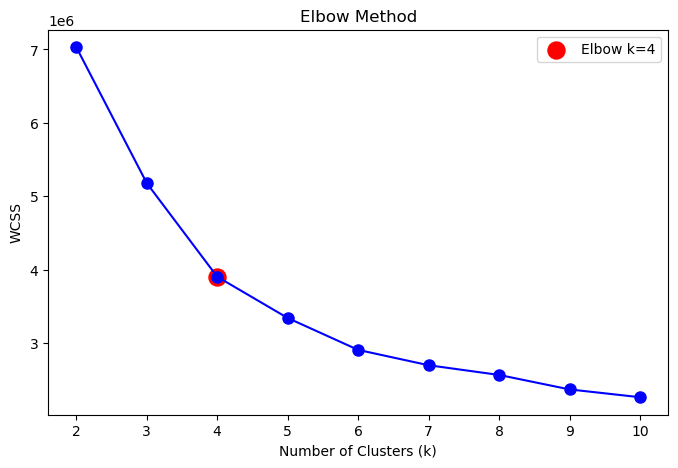

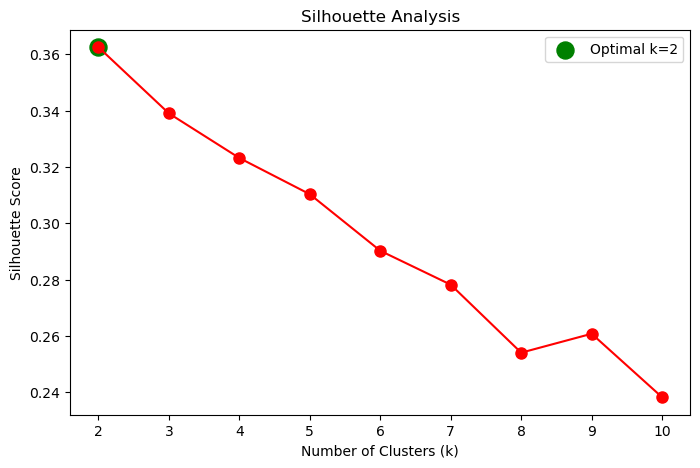

In [176]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming features are in X (after encoding & scaling)

K_range = range(2, 11)

# ---------- Elbow Method ----------
wcss = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Find elbow using the "knee" method
from kneed import KneeLocator
knee = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')
elbow_k = knee.knee

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.scatter(elbow_k, wcss[elbow_k-2], color='red', s=150, label=f'Elbow k={elbow_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.legend()
plt.show()


# ---------- Silhouette Score ----------
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

optimal_sil_k = K_range[np.argmax(sil_scores)]

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'ro-', markersize=8)
plt.scatter(optimal_sil_k, max(sil_scores), color='green', s=150, label=f'Optimal k={optimal_sil_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.legend()
plt.show()


In [177]:
from sklearn.cluster import KMeans

# Assuming your features are in X (after encoding & scaling)
# Use the optimal k from Step 5. For example:
optimal_k = elbow_k  # or optimal_sil_k, depending on which method you choose

# 1️⃣ Fit K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 2️⃣ Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# 3️⃣ Optional: view cluster counts
print(df['Cluster'].value_counts())


Cluster
1    1297
3    1279
2    1232
0    1192
Name: count, dtype: int64


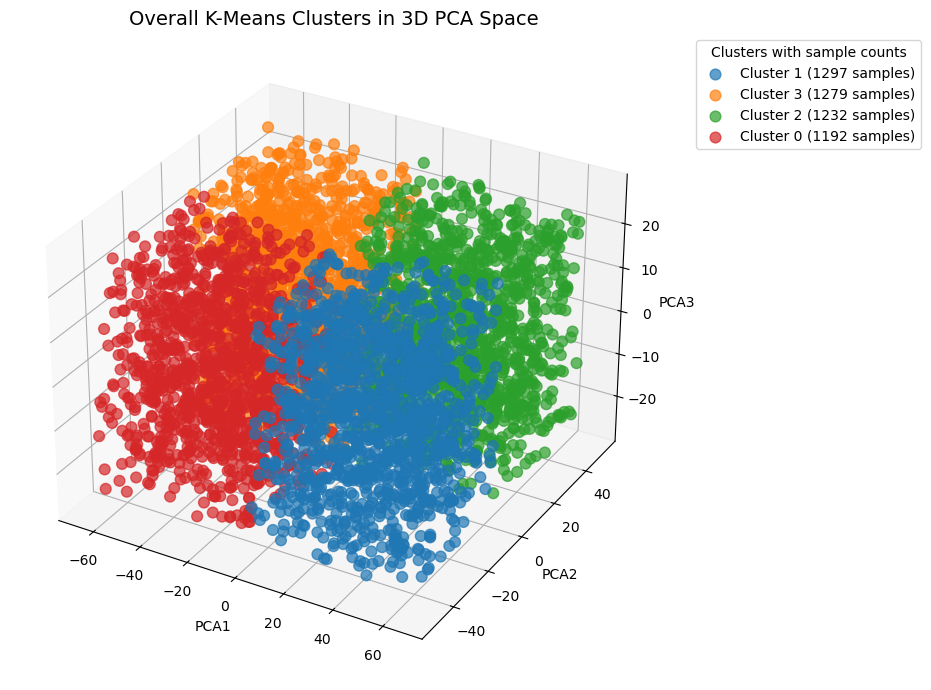

In [178]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Cluster counts
cluster_counts = {
    0: 1192,
    1: 1297,  # highest
    2: 1232,
    3: 1279
}

# Sort clusters by number of samples (highest → lowest)
sorted_clusters = sorted(cluster_counts, key=lambda x: cluster_counts[x], reverse=True)

# Reduce features to 3 principal components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

# Add PCA components to DataFrame
plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]
plot_df['PCA3'] = X_pca[:,2]

# =======================
# 1️⃣ Overall 3D visualization
# =======================
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette('tab10', n_colors=len(sorted_clusters))

for i, cluster in enumerate(sorted_clusters):
    subset = plot_df[plot_df['Cluster'] == cluster]
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
               s=60, color=colors[i], alpha=0.7,
               label=f'Cluster {cluster} ({cluster_counts[cluster]} samples)')

ax.set_title('Overall K-Means Clusters in 3D PCA Space', fontsize=14)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(title='Clusters with sample counts', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# =======================
# 2️⃣ Side-by-side 3D visualization of individual clusters
# =======================
fig = plt.figure(figsize=(20,5))  # wide figure for multiple plots

for i, cluster in enumerate(sorted_clusters):
    ax = fig.add_subplot(1, len(sorted_clusters), i+1, projection='3d')
    subset = plot_df[plot_df['Cluster'] == cluster]
    
    # Scatter points for this cluster only
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
               s=60, color=colors[i], alpha=0.8)
    
    # Centroid for annotation
    centroid_x = subset['PCA1'].mean()
    centroid_y = subset['PCA2'].mean()
    centroid_z = subset['PCA3'].mean()
    
    ax.text(centroid_x, centroid_y, centroid_z + 0.5,
            f'Cluster {cluster}\n{cluster_counts[cluster]} samples',
            fontsize=10, weight='bold', color='black', horizontalalignment='center')
    
    # Titles and labels
    ax.set_title(f'Cluster {cluster} (Samples: {cluster_counts[cluster]})', fontsize=12)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.suptitle('Individual Clusters in 3D PCA Space (Highest → Lowest Samples)', fontsize=16)
plt.tight_layout()
plt.show()


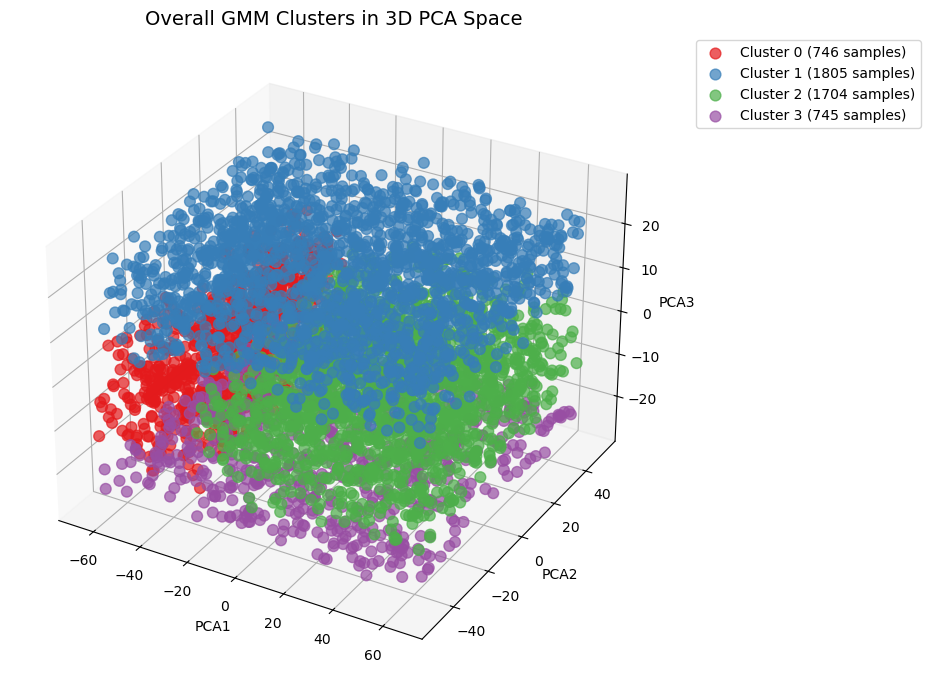

In [180]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np

# ----------------------------
# 1️⃣ Fit GMM and create cluster column
# ----------------------------
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X)  # X = scaled features
df['GMM_Cluster'] = gmm_labels

# ----------------------------
# 2️⃣ Reduce features to 3 PCA components for 3D visualization
# ----------------------------
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]
plot_df['PCA3'] = X_pca[:,2]

# ----------------------------
# 3️⃣ Overall 3D GMM clusters
# ----------------------------
unique_clusters = sorted(plot_df['GMM_Cluster'].unique())
cluster_counts = plot_df['GMM_Cluster'].value_counts().to_dict()
colors = sns.color_palette('Set1', n_colors=len(unique_clusters))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for i, cluster in enumerate(unique_clusters):
    subset = plot_df[plot_df['GMM_Cluster'] == cluster]
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
               s=60, color=colors[i], alpha=0.7,
               label=f'Cluster {cluster} ({cluster_counts[cluster]} samples)')

ax.set_title('Overall GMM Clusters in 3D PCA Space', fontsize=14)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# ----------------------------
# 4️⃣ Individual clusters side by side (Highest → Lowest samples)
# ----------------------------
sorted_clusters = sorted(cluster_counts, key=lambda x: cluster_counts[x], reverse=True)

fig = plt.figure(figsize=(20,5))  # wide figure for multiple plots

for i, cluster in enumerate(sorted_clusters):
    ax = fig.add_subplot(1, len(sorted_clusters), i+1, projection='3d')
    subset = plot_df[plot_df['GMM_Cluster'] == cluster]
    
    # Scatter points for this cluster only
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
               s=60, color=colors[i], alpha=0.8)
    
    # Centroid annotation
    centroid_x = subset['PCA1'].mean()
    centroid_y = subset['PCA2'].mean()
    centroid_z = subset['PCA3'].mean()
    
    ax.text(centroid_x, centroid_y, centroid_z + 0.5,
            f'Cluster {cluster}\n{cluster_counts[cluster]} samples',
            fontsize=10, weight='bold', color='black', horizontalalignment='center')
    
    ax.set_title(f'Cluster {cluster} (Samples: {cluster_counts[cluster]})', fontsize=12)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')

plt.suptitle('Individual GMM Clusters in 3D PCA Space (Highest → Lowest Samples)', fontsize=16)
plt.tight_layout()
plt.show()


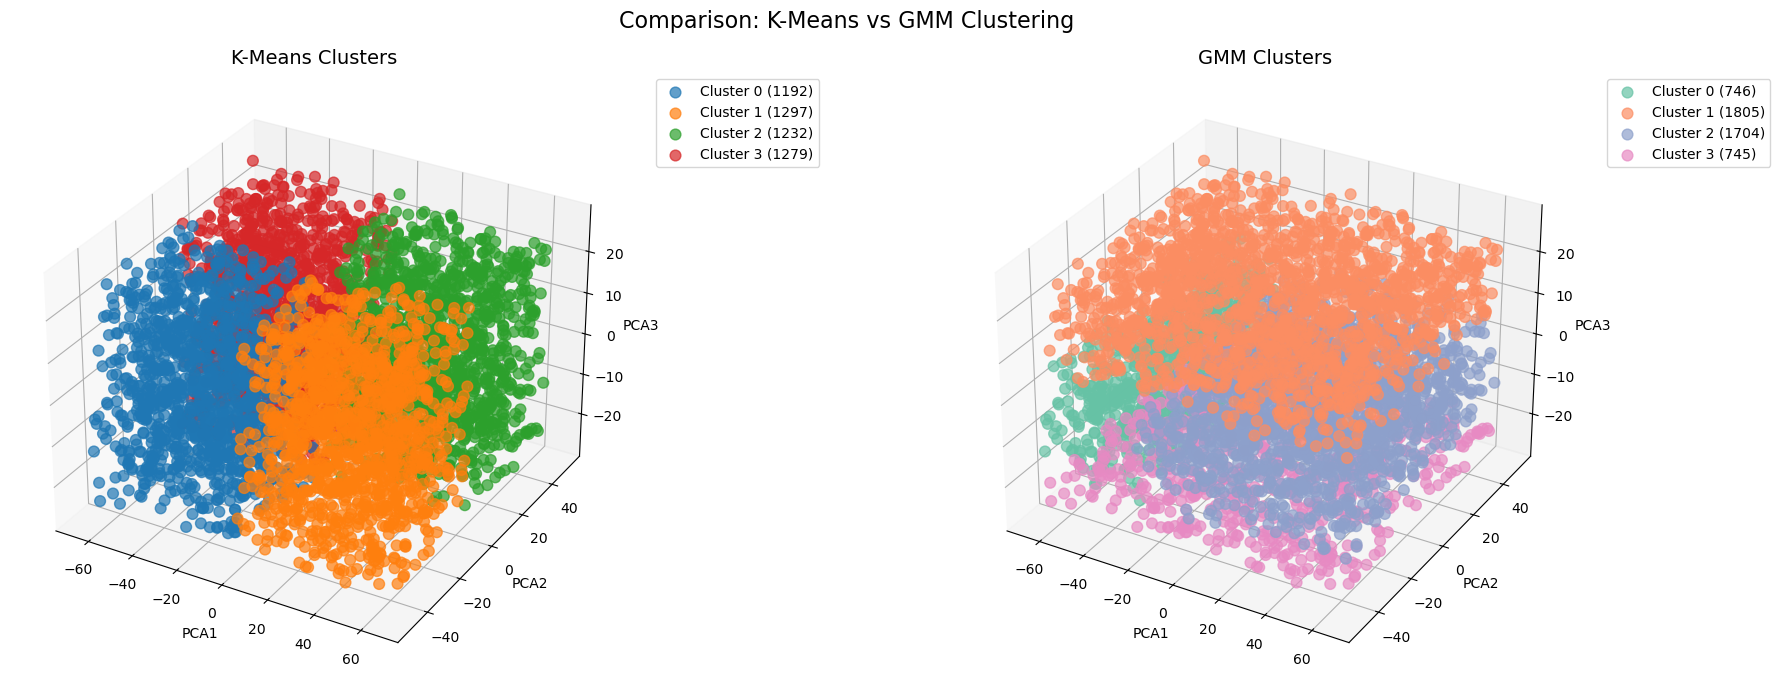

In [181]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# ------------------------------
# Reduce features to 3 PCA components
# ------------------------------
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)  # X = scaled features

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]
plot_df['PCA3'] = X_pca[:,2]

# ------------------------------
# Colors for clusters
# ------------------------------
kmeans_clusters = sorted(plot_df['Cluster'].unique())
gmm_clusters = sorted(plot_df['GMM_Cluster'].unique())

colors_k = sns.color_palette('tab10', n_colors=len(kmeans_clusters))
colors_g = sns.color_palette('Set2', n_colors=len(gmm_clusters))

# ------------------------------
# Side-by-side 3D plots
# ------------------------------
fig = plt.figure(figsize=(20,7))

# 1️⃣ K-Means
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for i, cluster in enumerate(kmeans_clusters):
    subset = plot_df[plot_df['Cluster'] == cluster]
    ax1.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
                s=60, color=colors_k[i], alpha=0.7,
                label=f'Cluster {cluster} ({len(subset)})')
ax1.set_title("K-Means Clusters", fontsize=14)
ax1.set_xlabel("PCA1")
ax1.set_ylabel("PCA2")
ax1.set_zlabel("PCA3")
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# 2️⃣ GMM
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for i, cluster in enumerate(gmm_clusters):
    subset = plot_df[plot_df['GMM_Cluster'] == cluster]
    ax2.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
                s=60, color=colors_g[i], alpha=0.7,
                label=f'Cluster {cluster} ({len(subset)})')
ax2.set_title("GMM Clusters", fontsize=14)
ax2.set_xlabel("PCA1")
ax2.set_ylabel("PCA2")
ax2.set_zlabel("PCA3")
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.suptitle("Comparison: K-Means vs GMM Clustering", fontsize=16)
plt.tight_layout()
plt.show()


Silhouette Score - K-Means: 0.323
Silhouette Score - GMM: 0.028


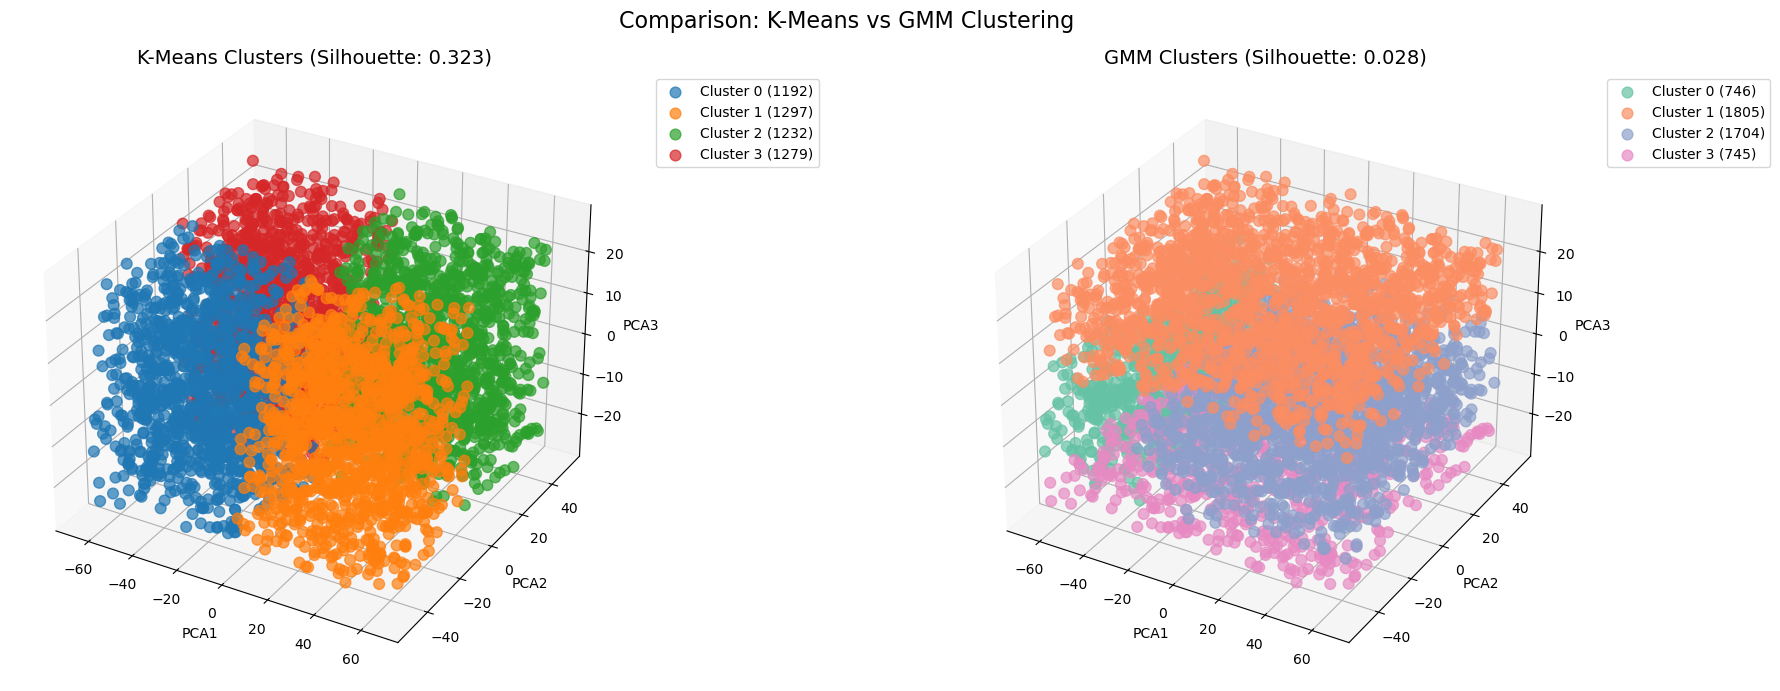

In [182]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# ------------------------------
# Compute Silhouette Scores
# ------------------------------
sil_kmeans = silhouette_score(X, df['Cluster'])
sil_gmm = silhouette_score(X, df['GMM_Cluster'])

print(f"Silhouette Score - K-Means: {sil_kmeans:.3f}")
print(f"Silhouette Score - GMM: {sil_gmm:.3f}")

# ------------------------------
# 3D PCA for visualization
# ------------------------------
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

plot_df = df.copy()
plot_df['PCA1'] = X_pca[:,0]
plot_df['PCA2'] = X_pca[:,1]
plot_df['PCA3'] = X_pca[:,2]

# ------------------------------
# Colors for clusters
# ------------------------------
kmeans_clusters = sorted(plot_df['Cluster'].unique())
gmm_clusters = sorted(plot_df['GMM_Cluster'].unique())

colors_k = sns.color_palette('tab10', n_colors=len(kmeans_clusters))
colors_g = sns.color_palette('Set2', n_colors=len(gmm_clusters))

# ------------------------------
# Side-by-side 3D plots
# ------------------------------
fig = plt.figure(figsize=(20,7))

# 1️⃣ K-Means
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for i, cluster in enumerate(kmeans_clusters):
    subset = plot_df[plot_df['Cluster'] == cluster]
    ax1.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
                s=60, color=colors_k[i], alpha=0.7,
                label=f'Cluster {cluster} ({len(subset)})')
ax1.set_title(f"K-Means Clusters (Silhouette: {sil_kmeans:.3f})", fontsize=14)
ax1.set_xlabel("PCA1")
ax1.set_ylabel("PCA2")
ax1.set_zlabel("PCA3")
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# 2️⃣ GMM
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for i, cluster in enumerate(gmm_clusters):
    subset = plot_df[plot_df['GMM_Cluster'] == cluster]
    ax2.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'],
                s=60, color=colors_g[i], alpha=0.7,
                label=f'Cluster {cluster} ({len(subset)})')
ax2.set_title(f"GMM Clusters (Silhouette: {sil_gmm:.3f})", fontsize=14)
ax2.set_xlabel("PCA1")
ax2.set_ylabel("PCA2")
ax2.set_zlabel("PCA3")
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.suptitle("Comparison: K-Means vs GMM Clustering", fontsize=16)
plt.tight_layout()
plt.show()


In [101]:
# Save dataframe to Excel
df.to_excel('clustered_customers.xlsx', index=False)
print("✔ Dataset exported as 'clustered_customers.xlsx'")


✔ Dataset exported as 'clustered_customers.xlsx'
